In [2]:
import json
import time
import math
import pandas as pd
pd.set_option('display.max_columns', None)
from selenium.webdriver.common.action_chains import ActionChains
# import geopandas as gpd
import re
import random
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler as Scaler
# Import the slearn utility to compare algorithms
from sklearn import model_selection
import tabpy_client
import numpy as np
import pickle
from selenium import webdriver
import time
import requests
import folium

In [221]:
connection = tabpy_client.Client('http://localhost:9004/')

In [3]:
rfc = pickle.load(open("model_rfc tableau.pkl", "rb"))
rfc2 = pickle.load(open("model_rfc tableau normal cond.pkl", "rb"))

In [6]:
new_df = pd.read_csv('filter tableau.csv')

In [35]:
new_df.columns

Index(['id', 'values_filter', 'filter', 'bill', 'chain', 'chain_place',
       'count_reviews', 'description', 'metro', 'name', 'rating',
       'rating_text', 'url', 'closed', 'address', 'lat', 'lng', 'mobility',
       'reviews', 'change_mobility', 'pandemic', 'district', 'district_n',
       'branch', 'exist_metro', 'count_cusine', 'values_filter_code', 'city',
       'type_bussiness', 'bill_str'],
      dtype='object')

In [7]:
df = new_df.loc[new_df.pandemic==1][['bill', 'closed', 
       'mobility', 'change_mobility', 
       'district_n', 'branch', 'exist_metro', 'count_cusine',
       'values_filter_code']]
train_set_labels = df["closed"].copy()
train_set = df.drop("closed", axis=1)

from sklearn.preprocessing import MinMaxScaler as Scaler
scaler = Scaler()
scaler.fit(train_set)

MinMaxScaler()

In [8]:
def get_prediction_pandemic(bill, mobility, change_mobility, district_n, branch, exist_metro, count_cusine, 
                     values_filter_code):
    X = np.column_stack([bill, mobility, change_mobility, district_n, branch,exist_metro, count_cusine, 
                         values_filter_code])
    X = scaler.transform(X)
    return str(int(round(rfc.predict_proba(X)[0][1], 2)*100))+'%'

In [11]:
df = new_df.loc[new_df.pandemic==0][['bill', 'closed', 
       'mobility', 'district_n', 'branch', 'exist_metro', 'count_cusine',
       'values_filter_code']]
train_set_labels = df["closed"].copy()
train_set = df.drop("closed", axis=1)

from sklearn.preprocessing import MinMaxScaler as Scaler
scaler2 = Scaler()
scaler2.fit(train_set)

MinMaxScaler()

In [264]:
def get_prediction(bill, mobility, district_n, branch, exist_metro, count_cusine, values_filter_code):
    X = np.column_stack([bill, mobility, district_n, branch,exist_metro, count_cusine, values_filter_code])
    X = scaler2.transform(X)
    return str(int(round(rfc2.predict_proba(X)[0][1], 2)*100))+'%'

In [17]:
l = ['авторская', 'азиатская', 'американская', 'бельгийская', 'боулы', 'вегетарианская', 'восточная', 'греческая', 
     'европейская',    'израильская', 'испанская', 'итальянская', 'немецкая', 'пышки', 'русская', 'сербская', 
     'скандинавская', 'смешанная',    'средиземноморская', 'стритфуд', 'французская', 'чешская', 'шашлыки', 'японская', 
     'dj', 'бассейн', 'бизнес_ланч',     'бильярд', 'бранч', 'гастрономические_сеты', 'детские_мастер_классы', 
     'детское_меню', 'за_городом', 'завтрак', 'заказ_кейтеринга', 'кабинки', 'камин', 'караоке', 'кулинарные_мастер_классы', 'можно_с_животными', 
     'настольные_игры',      'панорамный_вид', 'парковка', 'при_отеле','ресторан_у_воды', 'своя_пивоварня', 
     'спортивные_трансляции','чаевые_картой', 'шоу_программа', 'лофт','клуб', 'кальянная', 'placetype_n', 'district_n', 
     'change_mobility', 'exist_metro', 'bill', 'count_cusine', 'mobility', 'branch']
for i in l:
    exec(i+'=0')

In [13]:
pickle.dump(scaler, open('scaler_covid.pkl', 'wb'))
pickle.dump(scaler2, open('scaler_norm.pkl', 'wb'))

In [9]:
bill= 1208
mobility = 0
change_mobility = 0
district_n = 1
branch = 0
exist_metro = 0
count_cusine = 1 
values_filter_code = 85
get_prediction(bill, mobility, district_n, branch, exist_metro, count_cusine, values_filter_code),\
get_prediction_pandemic(bill, mobility, change_mobility, district_n, branch, exist_metro, count_cusine, 
                     values_filter_code)

'35%'

In [265]:
connection.deploy('Predict',
                  get_prediction_pandemic,
                  'Возвращает вероятность закрытия заведения', override = True)

In [266]:
connection.deploy('Predict2',
                  get_prediction,
                  'Возвращает вероятность закрытия заведения', override = True)

## Обучение

In [21]:
df = pd.read_csv('../НИР/df2020_3 v2.csv')

In [91]:
df = new_df.loc[new_df.pandemic == 1]

In [126]:
df = new_df.loc[new_df.pandemic == 0]

In [125]:
print(new_df.loc[(new_df.closed==1) & (new_df.pandemic == 0)].id.drop_duplicates().shape[0], 
      new_df.loc[(new_df.closed==0) & (new_df.pandemic == 0)].id.drop_duplicates().shape[0])

3593 3362


14997 15808 {0.0}


([<matplotlib.patches.Wedge at 0x2e3e28bc280>,
 [Text(0.04547664383258888, 1.0990595410921666, 'Закрытые: 0.49'),
  Text(-0.045476643832589016, -1.0990595410921666, 'Открытые: 0.51')])

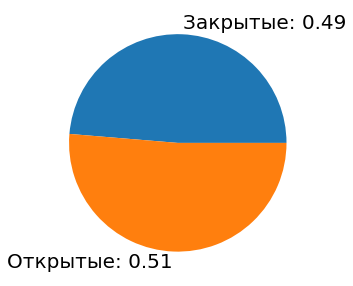

In [94]:
print(df.loc[df.closed==1].shape[0], df.loc[df.closed==0].shape[0], set(df.pandemic))
plt.figure(figsize = (5,5))
plt.pie([df.loc[df.closed==1].shape[0]/df.shape[0], df.loc[df.closed==0].shape[0]/df.shape[0]],\
        labels=['Закрытые: {:.2}'.format(df.loc[df.closed==1].shape[0]/df.shape[0]), 'Открытые: {:.2}'.format(df.loc[df.closed==0].shape[0]/df.shape[0])])

### скрытое

In [266]:
set(pd.DataFrame(df.cusine.str.replace(r"\[|\]|\'",'')).cusine.str.extractall(r'([\w|\s]*\,*)')[0].str.replace(',','').str.strip())

{nan,
 'авторская',
 'азиатская',
 'американская',
 'армянская',
 'бельгийская',
 'боулы',
 'бургеры',
 'вегетарианская',
 'восточная',
 'вьетнамская',
 'греческая',
 'грузинская',
 'десерты',
 'европейская',
 'израильская',
 'индийская',
 'испанская',
 'итальянская',
 'кавказская',
 'китайская',
 'коктейли',
 'корейская',
 'крабы',
 'крафтовое пиво',
 'латиноамериканская',
 'мексиканская',
 'немецкая',
 'пиво',
 'пицца',
 'пышки',
 'рамен',
 'русская',
 'рыба и морепродукты',
 'сербская',
 'скандинавская',
 'смешанная',
 'средиземноморская',
 'стейки',
 'стритфуд',
 'суши',
 'тайская',
 'торты на заказ',
 'узбекская',
 'устрицы',
 'французская',
 'хинкали',
 'чешская',
 'шаверма',
 'шашлыки',
 'японская'}

In [269]:
set(pd.DataFrame(df.features.str.replace(r"\[|\]|\'",'')).features.str.extractall(r'([\w|\s|\-]*\,*)')[0].str.replace(',','').str.strip())

{'dj',
 nan,
 'бассейн',
 'бизнес-ланч',
 'бильярд',
 'бранч',
 'гастрономические сеты',
 'детская комната',
 'детские мастер-классы',
 'детское меню',
 'доставка',
 'еда навынос',
 'живая музыка',
 'за городом',
 'завтрак',
 'заказ кейтеринга',
 'здесь танцуют',
 'кабинки',
 'кальян',
 'камин',
 'караоке',
 'кулинарные мастер-классы',
 'можно с животными',
 'можно со своей едой',
 'настольные игры',
 'панорамный вид',
 'парковка',
 'при отеле',
 'ресторан у воды',
 'своя пивоварня',
 'спортивные трансляции',
 'стриптиз',
 'чаевые картой',
 'шоу-программа'}

In [156]:
df2020_3 = df[['url', 'cusine']]

In [271]:
temp_list = ['dj',
 'бассейн',
 'бизнес-ланч',
 'бильярд',
 'бранч',
 'гастрономические сеты',
 'детская комната',
 'детские мастер-классы',
 'детское меню',
 'доставка',
 'еда навынос',
 'живая музыка',
 'за городом',
 'завтрак',
 'заказ кейтеринга',
 'здесь танцуют',
 'кабинки',
 'кальян',
 'камин',
 'караоке',
 'кулинарные мастер-классы',
 'можно с животными',
 'можно со своей едой',
 'настольные игры',
 'панорамный вид',
 'парковка',
 'при отеле',
 'ресторан у воды',
 'своя пивоварня',
 'спортивные трансляции',
 'стриптиз',
 'чаевые картой',
 'шоу-программа']
for c in temp_list:
    df[c] = 0
    df.loc[df.features.astype(str).str.contains(c), c] = 1

In [164]:
cuisine_prior = pd.DataFrame(df2020_3.describe().loc['mean']*100)

In [183]:
cluster_df = pd.DataFrame(df.cusine.str.replace(r"\[|\]|\'",'')).cusine.str.split(',', expand = True)

In [212]:
cuisine_prior.loc['авторская', "mean"]

2.361111111111111

In [220]:
top = []
for i in range(0, 720):
    d = {}
    for j in range(0, 3):
        try:
            d[cluster_df.loc[i, j].strip()] = cuisine_prior.loc[cluster_df.loc[i, j].strip(), 'mean']
        except:
            d[None] = 0
    top.append(max(d, key=d.get))

In [222]:
cluster_df['top'] = top

In [225]:
set(cluster_df.top)

{None,
 'авторская',
 'азиатская',
 'американская',
 'армянская',
 'бургеры',
 'вегетарианская',
 'восточная',
 'вьетнамская',
 'грузинская',
 'десерты',
 'европейская',
 'индийская',
 'итальянская',
 'кавказская',
 'китайская',
 'коктейли',
 'крабы',
 'крафтовое пиво',
 'мексиканская',
 'пиво',
 'пицца',
 'пышки',
 'русская',
 'рыба и морепродукты',
 'сербская',
 'смешанная',
 'средиземноморская',
 'стритфуд',
 'суши',
 'торты на заказ',
 'французская',
 'японская'}

In [226]:
df['top_cuisine'] = cluster_df['top'].astype('category')
df['cuisine_n'] = cluster_df['top'].astype('category').cat.codes

In [251]:
df.columns

Index(['id', 'values_filter', 'filter', 'placetype', 'bill', 'chain',
       'chain_place', 'count_reviews', 'description', 'metro', 'name',
       'rating', 'rating_text', 'url', 'closed', 'address', 'lat', 'lng',
       'mobility', 'reviews', 'change_mobility', 'pandemic', 'district',
       'district_n', 'branch', 'exist_metro', 'count_cusine',
       'values_filter_code'],
      dtype='object')

In [22]:
df = df[['авторская', 'азиатская', 'американская', 'бельгийская', 'боулы',
       'вегетарианская', 'восточная', 'греческая', 'европейская',
       'израильская', 'испанская', 'итальянская', 'немецкая', 'пышки',
       'русская', 'сербская', 'скандинавская', 'смешанная',
       'средиземноморская', 'стритфуд', 'французская', 'чешская', 'шашлыки',
       'японская', 'dj', 'бассейн', 'бизнес-ланч', 'бильярд', 'бранч',
       'гастрономические сеты', 'детские мастер-классы', 'детское меню',
       'за городом', 'завтрак', 'заказ кейтеринга', 'кабинки', 'камин',
       'караоке', 'кулинарные мастер-классы', 'можно с животными',
       'настольные игры', 'панорамный вид', 'парковка', 'при отеле',
       'ресторан у воды', 'своя пивоварня', 'спортивные трансляции',
       'чаевые картой', 'шоу-программа', 'лофт','клуб', 'кальянная', 'placetype_n', 'district_n', 'change_mobility',
       'exist_metro', 'bill', 'count_cusine', 'closed', 'mobility', 'branch'
       ]]

In [239]:
df_2 = df[['closed', 'mobility', 'change_mobility',
        'placetype_n', 'district_n', 'branch',]]

In [238]:
df.to_csv('df for model.csv', index = False)

### продолжаем

In [127]:
df = df[['bill', 'closed', 
       'mobility', 
#          'change_mobility', 
       'district_n', 'branch', 'exist_metro', 'count_cusine',
       'values_filter_code']]

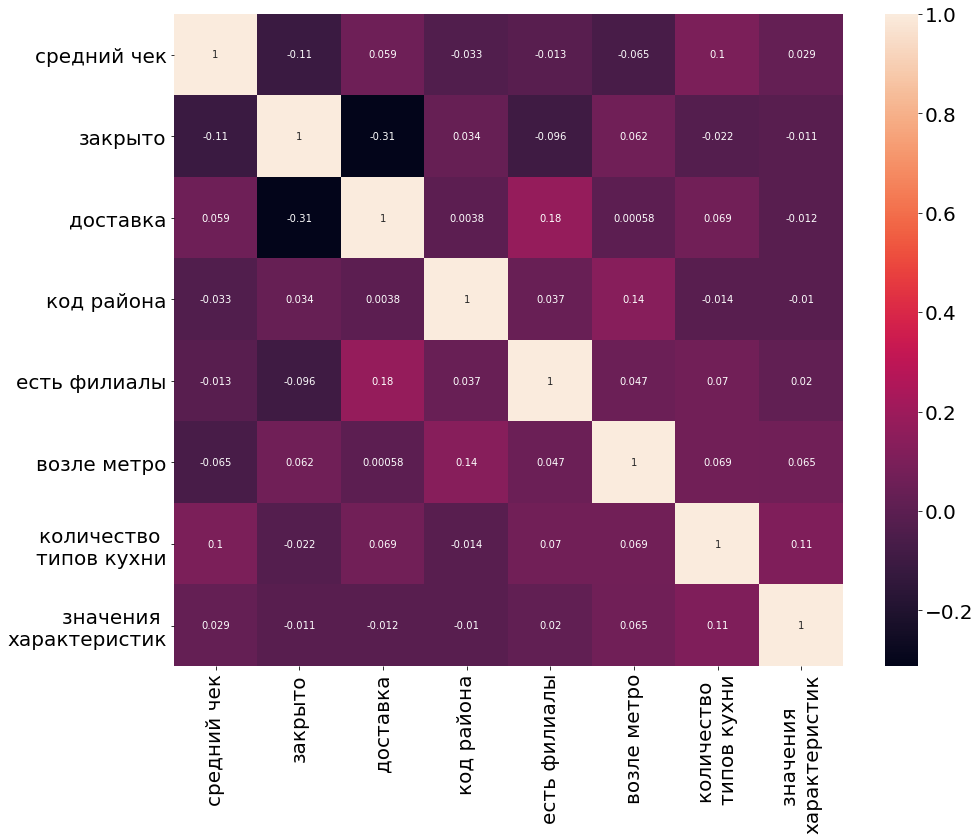

In [130]:
plt.figure(figsize=(15, 12))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 

sns.heatmap(df.corr(), annot = True, xticklabels =['средний чек', "закрыто", "доставка", "код района", 
                                                   "есть филиалы", "возле метро", "количество \nтипов кухни", 
                                                   "значения \nхарактеристик"],
           yticklabels =['средний чек', "закрыто", "доставка", "код района", 
                                                   "есть филиалы", "возле метро", "количество \nтипов кухни", 
                                                   "значения \nхарактеристик"],)

In [96]:
train_set_labels = df["closed"].copy()
train_set = df.drop("closed", axis=1)

In [97]:
from sklearn.preprocessing import MinMaxScaler as Scaler

scaler = Scaler()
scaler.fit(train_set)
train_set_scaled = scaler.transform(train_set)

In [98]:
models = [
    ('LR', LogisticRegression()),
    ('KNN', KNeighborsClassifier()),
    ('NB', GaussianNB()),
    ('SVC', SVC()),
    ('LSVC', LinearSVC()),
    ('RFC', RandomForestClassifier())
#     ('DTR', DecisionTreeRegressor())
]

In [99]:
results = {
    'accuracy':[],
    'recall':[],
    'precision':[],
    'f1':[]
}
results_mean = {
    'accuracy':[],
    'recall':[],
    'precision':[],
    'f1':[]
}
names = []
X = train_set_scaled
Y = train_set_labels

In [100]:
for score in [ 'recall', 'precision','accuracy', 'f1']:
    for name, model in models:
        kfold = model_selection.KFold(n_splits=10)
        cv_results = model_selection.cross_val_score(model, X, Y.to_list(), cv=kfold, scoring=score)
        results[score].append(cv_results)
        results_mean[score].append([cv_results.mean()])
        names.append(name)
        msg = "%s: %f (%f)" % (
            name, cv_results.mean(), cv_results.std())
        print(msg)

C:\Users\yupes\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yupes\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yupes\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LR: 0.457539 (0.336141)


C:\Users\yupes\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yupes\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yupes\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yupes\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being se

KNN: 0.366328 (0.250153)


C:\Users\yupes\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yupes\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NB: 0.684282 (0.448111)


C:\Users\yupes\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yupes\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yupes\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVC: 0.492335 (0.349120)


C:\Users\yupes\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yupes\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yupes\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LSVC: 0.459122 (0.336235)


C:\Users\yupes\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yupes\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yupes\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


RFC: 0.362642 (0.246107)
LR: 0.520115 (0.380961)
KNN: 0.514789 (0.384842)
NB: 0.510317 (0.375892)
SVC: 0.517644 (0.378856)
LSVC: 0.520117 (0.380962)
RFC: 0.530820 (0.391021)
LR: 0.479075 (0.148026)
KNN: 0.500471 (0.080749)
NB: 0.587624 (0.275347)
SVC: 0.501825 (0.131949)
LSVC: 0.480406 (0.147616)
RFC: 0.527512 (0.080694)
LR: 0.451070 (0.307979)
KNN: 0.409089 (0.278869)
NB: 0.572609 (0.393289)
SVC: 0.474970 (0.317624)
LSVC: 0.452486 (0.308636)
RFC: 0.413134 (0.279035)


In [101]:
names = ['LR', 'KNN', 'NB', 'SVC', 'LSVC', 'RFC']

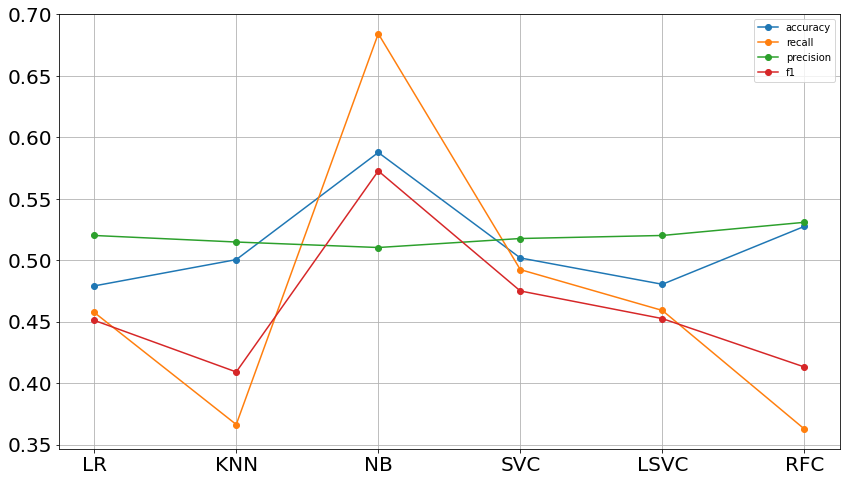

In [102]:
fig = plt.figure(figsize = (14, 8))
plt.plot(names,results_mean['accuracy'], '-o')
plt.plot(names,results_mean['recall'], '-o')
plt.plot(names,results_mean['precision'], '-o')
plt.plot(names,results_mean['f1'], '-o')
plt.grid()
plt.legend(results_mean.keys())

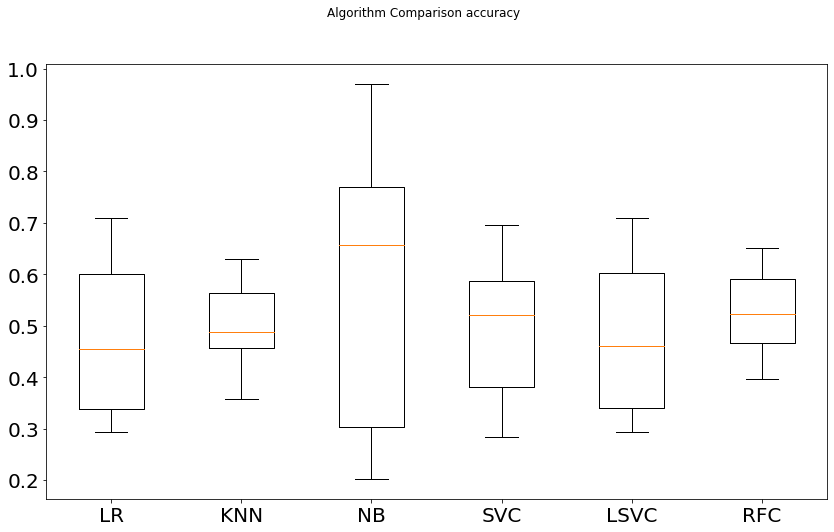

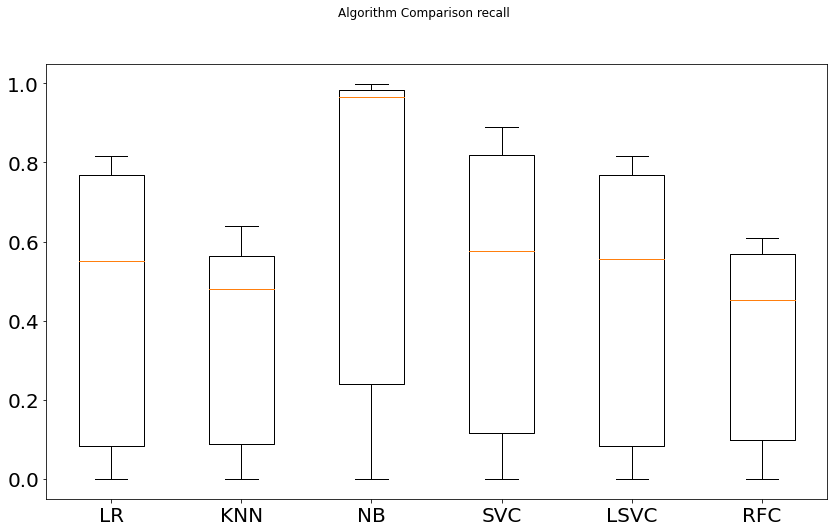

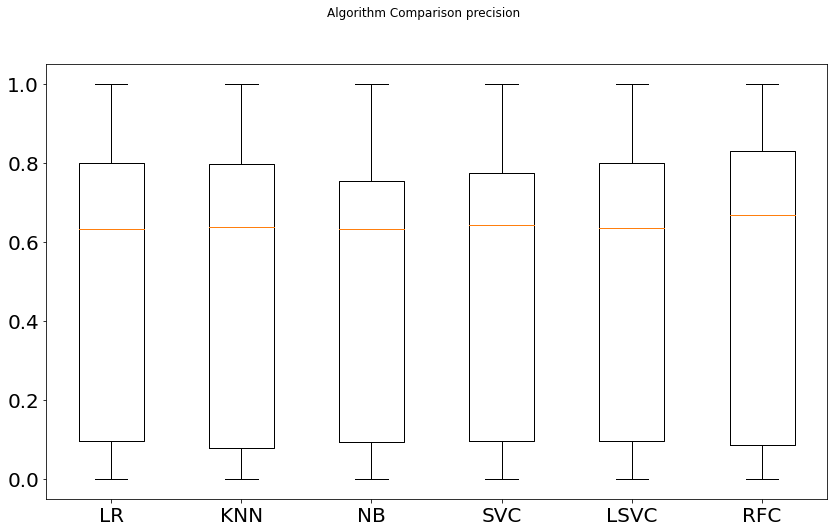

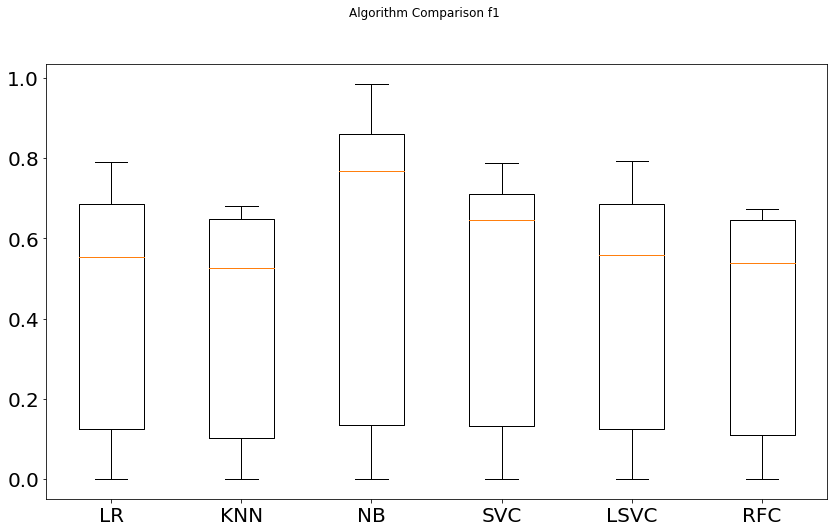

In [104]:
# boxplot algorithm comparison
fig = plt.figure(figsize = (14, 8))
fig.suptitle('Algorithm Comparison accuracy')
ax = fig.add_subplot(111)
plt.boxplot(results['accuracy'])
ax.set_xticklabels(names)
plt.show()
fig = plt.figure(figsize = (14, 8))
fig.suptitle('Algorithm Comparison recall')
ax = fig.add_subplot(111)
plt.boxplot(results['recall'])
ax.set_xticklabels(names)
plt.show()
fig = plt.figure(figsize = (14, 8))
fig.suptitle('Algorithm Comparison precision')
ax = fig.add_subplot(111)
plt.boxplot(results['precision'])
ax.set_xticklabels(names)
plt.show()
fig = plt.figure(figsize = (14, 8))
fig.suptitle('Algorithm Comparison f1')
ax = fig.add_subplot(111)
plt.boxplot(results['f1'])
ax.set_xticklabels(names)
plt.show()

In [105]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.3, random_state=42)

train_set_labels = train_set["closed"].copy()
train_set = train_set.drop("closed", axis=1)

test_set_labels = test_set["closed"].copy()
test_set = test_set.drop("closed", axis=1)

scaler = Scaler()
scaler.fit(train_set)
train_set_scaled = scaler.transform(train_set)
test_set_scaled = scaler.transform(test_set)

In [106]:
from sklearn.model_selection import GridSearchCV

param_grid={
      'n_estimators': range (10, 51, 10),
      'max_depth': range (1,13, 2),
      'min_samples_leaf': range (1,8),
#       'min_samples_split': range (2,10,2),
#       'criterion': ["gini", "entropy"]
    }
# param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}
model = RandomForestClassifier()
# model = GaussianNB()
grid_search = GridSearchCV(model, param_grid, cv=10, scoring='accuracy')
grid_search.fit(train_set_scaled, train_set_labels)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(1, 13, 2),
                         'min_samples_leaf': range(1, 8),
                         'n_estimators': range(10, 51, 10)},
             scoring='accuracy')

In [107]:
grid_search.best_score_

0.676993789044256

In [108]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=11, min_samples_leaf=2, n_estimators=30)

In [109]:
rfc = grid_search.best_estimator_
# rfc = RandomForestClassifier(max_depth=11, n_estimators=30)
X = np.append(train_set_scaled, test_set_scaled, axis=0)
Y = np.append(train_set_labels, test_set_labels, axis=0)

# Train the model
rfc.fit(train_set_scaled, train_set_labels)

RandomForestClassifier(max_depth=11, min_samples_leaf=2, n_estimators=30)

In [110]:
pickle.dump(rfc, open("model_rfc tableau normal cond.pkl", "wb"))

In [111]:
from sklearn.metrics import recall_score as rs
from sklearn.metrics import precision_score as ps
from sklearn.metrics import f1_score as fs
from sklearn.metrics import balanced_accuracy_score as bas
from sklearn.metrics import confusion_matrix as cm

In [112]:
pred = np.array(rfc.predict(test_set_scaled))

recall = rs(test_set_labels,pred)
precision = ps(test_set_labels,pred)
f1 = fs(test_set_labels,pred)
ma = rfc.score(test_set_scaled,test_set_labels)

In [114]:
print('*** Оценочные метрики для тестового набора данных ***\n')
print('Recall: ',recall)
print('Precision: ',precision)
print('F1: ',f1)
print('Accuracy: ',ma)
a = pd.DataFrame(test_set_labels)
a['pred']= rfc.predict(test_set_scaled)
print('\n')
print(a.sample(5))

*** Оценочные метрики для тестового набора данных ***

Recall:  0.8179190751445087
Precision:  0.622820382596919
F1:  0.7071600192215282
Accuracy:  0.6703094568275265


       closed  pred
25176     1.0   0.0
28561     0.0   0.0
27747     0.0   1.0
25013     1.0   1.0
7506      0.0   1.0


<BarContainer object of 4 artists>

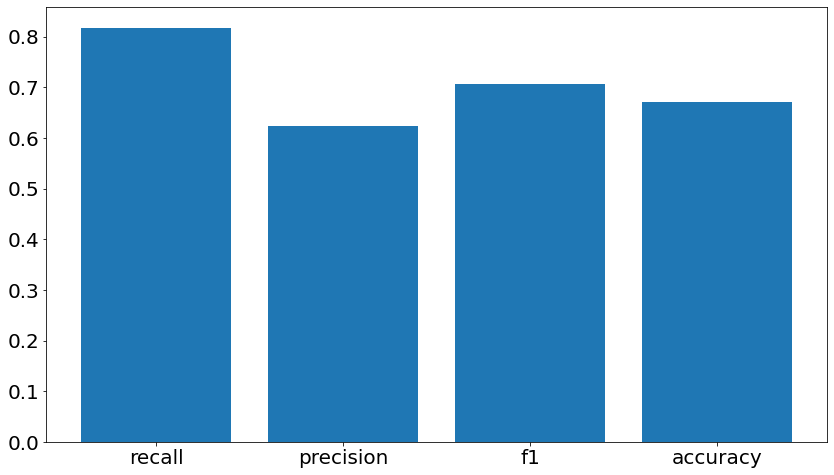

In [115]:
plt.figure(figsize=(14, 8))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.bar([ 'recall', 'precision', 'f1','accuracy'], [recall, precision, f1, ma])

In [310]:
rfc.feature_importances_

array([0.1007884 , 0.02947041, 0.04584402, 0.07624675, 0.04971527,
       0.06770644, 0.00736885, 0.02072204, 0.01487979, 0.00783693,
       0.00177728, 0.07235803, 0.01057805, 0.0031529 , 0.00277433,
       0.0087441 , 0.00528121, 0.00104015, 0.00077121, 0.00131207,
       0.00152654, 0.00631505, 0.0083373 , 0.0028733 , 0.        ,
       0.00365198, 0.02452149, 0.        , 0.00197938, 0.00048201,
       0.00320689, 0.00683153, 0.00070281, 0.00437608, 0.00378637,
       0.00063776, 0.00519417, 0.        , 0.00490637, 0.00816743,
       0.        , 0.00091355, 0.00232678, 0.00147104, 0.00068559,
       0.00330923, 0.00289499, 0.00842548, 0.00923573, 0.00688647,
       0.00195005, 0.0024206 , 0.0175777 , 0.00092607, 0.01020684,
       0.0034435 , 0.000845  , 0.01022718, 0.01325568, 0.0004596 ,
       0.02210572, 0.00432678, 0.        , 0.00132253, 0.00574573,
       0.00255487, 0.02330497, 0.0213269 , 0.01222881, 0.01220995,
       0.00464291, 0.01591215, 0.01607807, 0.00650588, 0.00712

In [116]:
fi = pd.DataFrame({
#     'feature':['bill', 'mobility', 'placetype_n', 'district_n', 'change_mobility',
#         'branch', 'exist_metro', 'count_cusine', 
#        'bill_class', 'итальянская', 'русская', 'японская', 'смешанная',
#        'европейская', 'китайская'],
    'feature': list(train_set.columns),
                   'importance': rfc.feature_importances_}).\
                    sort_values('importance', ascending = False)

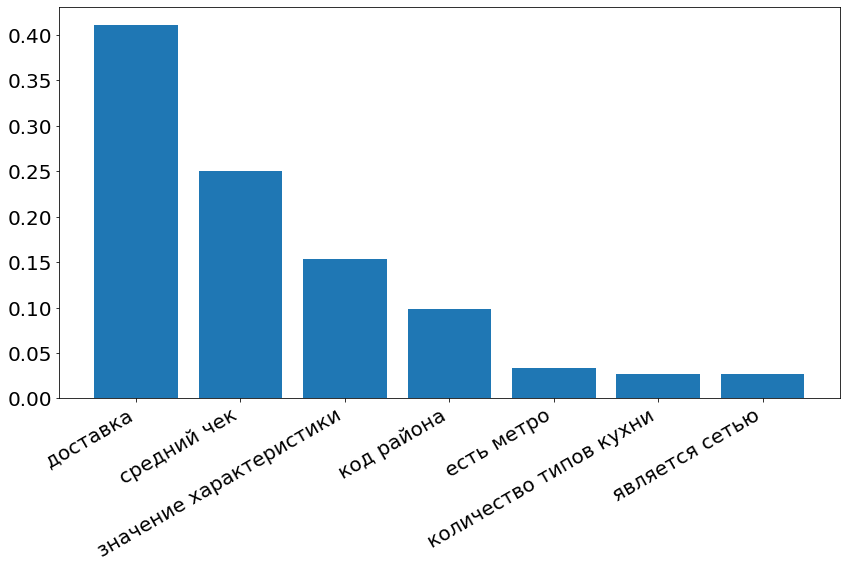

In [119]:
plt.figure(figsize = (14,8))
# plt.bar(fi.feature[:10], fi.importance.to_list()[:10])
plt.bar(['доставка', "средний чек", "значение характеристики", "код района", "есть метро", "количество типов кухни",
         "является сетью"], fi.importance.to_list()[:10])
# plt.xticks()
plt.gcf().autofmt_xdate()

In [65]:
fi

,feature,importance
0,bill,0.252402
2,change_mobility,0.180095
7,values_filter_code,0.129010
3,district_n,0.124108
4,branch,0.121676
1,mobility,0.119165
6,count_cusine,0.058264
5,exist_metro,0.015280


## Создание датасета

In [55]:
df1 = pd.read_csv('../НИР/df2020_3 v2.csv')
df2 = pd.read_csv('../НИР/df pandemic.csv')
dff = pd.read_csv('filter.csv', sep = ';')
df = pd.read_csv('../НИР/df2020_3.csv')

In [98]:
df.sample()

,bill,chain,chain_place,count_reviews,cusine,description,id,metro,name,rating,rating_text,url,closed,address,lat,lng,mobility,features,reviews,branch,авторская,азиатская,американская,бельгийская,боулы,вегетарианская,восточная,греческая,европейская,израильская,испанская,итальянская,немецкая,пышки,русская,сербская,скандинавская,смешанная,средиземноморская,стритфуд,украинская,французская,чешская,шашлыки,японская,delivery,pickup,count_cusine,closed_pandemic,_антикафе,_банкетный зал,_винотека,_детское кафе,_кафе,_кафе-мороженое,_кейтеринг,_корабль,_корнер,_кофейня,_кулинария,_кулинарная студия,_лаунж,_пекарня,_ресторан,_ресторанный комплекс,_рюмочная,_семейный ресторан,_спортбар,_столовая,_фастфуд,_фудмаркет,_чайная,стейк-хаус,кондитерская,бар,_Адмиралтейский район,_Василеостровский район,_Выборгский район,_Калининский район,_Кировский район,_Колпинский район,_Красногвардейский район,_Курортный район,_Московский район,_Невский район,_Петроградский район,_Приморский район,_Пушкинский район,_Фрунзенский район,_Центральный район,exist_metro,dj,бассейн,бизнес-ланч,бильярд,бранч,гастрономические сеты,детские мастер-классы,детское меню,за городом,завтрак,заказ кейтеринга,кабинки,камин,караоке,кулинарные мастер-классы,можно с животными,настольные игры,панорамный вид,парковка,при отеле,ресторан у воды,своя пивоварня,спортивные трансляции,чаевые картой,шоу-программа,лофт,клуб,кальянная,change_mobility
399,1300.0,21.0,NaN,4 отзыва,"['европейская', 'американская']",\n Beer House — двухэтажный пив...,46278,Девяткино,Beer House,8.9,Отлично,/spb/place/beer-house,0.0,бульв. Менделеева 11 к2,60.05209,30.427645,1,"спортивные трансляции, бизнес-ланч, доставка",4,1,0,0,1,0,0,0,0,0,1,0,0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [114]:
#разница списков
list(set(df.columns)-set(df1.columns)) 

['_Приморский район',
 '_Петроградский район',
 '_банкетный зал',
 '_семейный ресторан',
 '_Калининский район',
 'delivery',
 '_Выборгский район',
 'украинская',
 '_Адмиралтейский район',
 '_Колпинский район',
 '_кулинарная студия',
 '_фастфуд',
 'pickup',
 '_Пушкинский район',
 '_столовая',
 '_детское кафе',
 '_Кировский район',
 '_антикафе',
 'стейк-хаус',
 '_Фрунзенский район',
 '_чайная',
 '_рюмочная',
 '_кофейня',
 '_ресторан',
 '_фудмаркет',
 'closed_pandemic',
 '_кулинария',
 '_Московский район',
 '_корабль',
 '_Курортный район',
 '_корнер',
 '_винотека',
 '_спортбар',
 '_Василеостровский район',
 '_Центральный район',
 '_Красногвардейский район',
 '_лаунж',
 'address',
 '_кейтеринг',
 '_пекарня',
 '_ресторанный комплекс',
 '_кафе',
 '_кафе-мороженое',
 'кондитерская',
 'бар',
 '_Невский район']

In [157]:
add_columns = ['id','name', 'lat', 'lng', 'url','description','chain','chain_place', 'cusine', 'features','rating_text',
               'rating','reviews','count_reviews','metro', 'address', 'closed_pandemic']
for c in add_columns:
    df_copy[c] = df[c]

In [85]:
districts = []
for s in list(df.columns[75:90]):
    districts.append(s.replace('_', ''))

In [88]:
districts_df = pd.DataFrame({'district':districts, 'codes':range(0, 15)})

In [93]:
df1 = df1.merge(districts_df, right_on = 'codes', left_on = 'district_n', how = 'left').drop(columns = 'codes')

In [119]:
df1['count_cusine'] = pd.DataFrame(df1.cusine.str.replace(r"\[|\]|\'",'')).cusine.str.split(',').str.len()

In [135]:
df1 = df1.merge(df2[['id', 'placetype']], on = 'id', how = 'left')

In [136]:
df1.to_csv('data.csv', index = False)

In [137]:
df_copy = df1.copy()

In [144]:
df_all = pd.read_csv('../НИР/all_places 2020.csv')

In [161]:
df_copy['pandemic'] = 1

In [163]:
filter_df = pd.concat([df_copy[['bill', 'chain', 'chain_place', 'count_reviews', 'cusine',
       'description', 'id', 'metro', 'name', 'rating', 'rating_text', 'url',
       'closed', 'address', 'lat', 'lng', 'placetype', 'mobility', 'features',
       'reviews', 'change_mobility', 'pandemic']], df_all[['bill', 'chain', 'chain_place', 'count_reviews', 'cusine',
       'description', 'id', 'metro', 'name', 'rating', 'rating_text', 'url',
       'closed', 'address', 'lat', 'lng', 'placetype', 'mobility', 'features',
       'reviews']]], ignore_index = True).drop_duplicates(subset = 'id')

In [166]:
filter_df.pandemic = filter_df.pandemic.fillna(0)

In [178]:
filter_df.to_csv('data tableau.csv', index = False)

In [172]:
filter_df = pd.read_csv('data tableau.csv')

In [176]:
filter_df['placetype_n']=filter_df['placetype_n']+1
filter_df['district_n']=filter_df['district_n']+1

In [182]:
df_all['cusine'] = pd.DataFrame(df_all.cusine.str.replace(r"\[|\]|\'",'')).cusine.str.split(',')

In [214]:
filter_df['cusine'] = filter_df.cusine.str.replace(r"\[|\]|\'",'')

In [190]:
df['filter'] = 'Тип заведения'

In [223]:
temp = []
for i, r in filter_df[['id', 'cusine']].iterrows():
    for c in str(r['cusine']).replace(r"\[|\]|\'",'').split(','):
        if c.strip() != '':
            temp.append({'id':r['id'], 'values_filter': c.strip()})
cusine_df = pd.DataFrame(temp)

In [221]:
cusine_df

,id,values_filter
0,38020,европейская
1,38020,бургеры
2,42499,рыба и морепродукты
3,42499,устрицы
4,42499,крабы
...,...,...
13042,28116,смешанная
13043,28116,европейская
13044,475,европейская
13045,475,смешанная


In [225]:
#cusine_df['values_filter'].drop_duplicates().to_list()
cuisine = ['европейская','вегетарианская',
 'смешанная',
 'стритфуд',
 'русская','восточная',
 'азиатская',
 'японская','грузинская','мексиканская',
 'латиноамериканская','итальянская','кавказская','авторская',
 'средиземноморская',
 'греческая',
 'китайская',
 'бельгийская',
 'тайская',
 'скандинавская',
 'американская',
 'французская','индийская',
 'чешская','корейская',
 'испанская',
 'немецкая',
 'узбекская','вьетнамская','армянская',
 'сербская','израильская',
 'украинская',]
dish = ['бургеры',
 'рыба и морепродукты',
 'устрицы','пышки',
 'рамен',
 'крабы', 'десерты',
 'коктейли','суши','хинкали','стейки','пиво',
 'крафтовое пиво','шашлыки','пицца','шаверма', 'боулы','торты на заказ','блюда из дичи']
cusine_df['filter'] = ''
cusine_df.loc[cusine_df['values_filter'].isin(cuisine), 'filter'] = 'Кухня'
cusine_df.loc[cusine_df['values_filter'].isin(dish), 'filter'] = 'Блюдо'

In [277]:
placetype_df = filter_df[['id', 'placetype']]
placetype_df.rename(columns = {'placetype':'values_filter'}, inplace=True)
placetype_df['filter'] = 'Тип заведения'

C:\Users\yupes\anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
<ipython-input-277-b78c4d480d86>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  placetype_df['filter'] = 'Тип заведения'


In [236]:
temp = []
for i, r in filter_df[['id', 'features']].iterrows():
    for f in str(r['features']).split(','):
        if f.strip() != 'nan':
            temp.append({'id':r['id'], 'values_filter': f.strip()})
feature_df = pd.DataFrame(temp)

In [238]:
feature_df['filter'] = 'Особенность'

In [239]:
filter_df.columns

Index(['bill', 'chain', 'chain_place', 'count_reviews', 'cusine',
       'description', 'id', 'metro', 'name', 'rating', 'rating_text', 'url',
       'closed', 'address', 'lat', 'lng', 'placetype', 'mobility', 'features',
       'reviews', 'change_mobility', 'pandemic', 'district', 'placetype_n',
       'district_n', 'branch', 'exist_metro', 'count_cusine'],
      dtype='object')

In [279]:
new_df = pd.concat([cusine_df, placetype_df,feature_df], ignore_index = True).merge(filter_df[['bill', 'chain', 'chain_place', 
       'count_reviews', 'description', 'id', 'metro', 'name', 'rating', 'rating_text', 'url',
       'closed', 'address', 'lat', 'lng', 'mobility','reviews', 'change_mobility', 'pandemic', 'district',
       'district_n', 'branch', 'exist_metro', 'count_cusine']], on = 'id', how = 'left')

In [280]:
new_df['values_filter_code'] = new_df.values_filter.astype('category').cat.codes

In [281]:
new_df['values_filter_code'] = new_df['values_filter_code']+1

In [45]:
new_df.to_csv('filter tableau.csv', index = False)

In [3]:
new_df['city'] = "Санкт-Петербург"
new_df['type_bussiness'] = "Общественное питание"

In [310]:
new_df.shape, new_df.drop_duplicates().shape

((34213, 29), (34213, 29))

In [312]:
filter_old = pd.read_csv('filter.csv', sep =';')

In [317]:
new_df.loc[(new_df.bill >300) & (new_df.bill <700)]

,id,values_filter,filter,bill,chain,chain_place,count_reviews,description,metro,name,rating,rating_text,url,closed,address,lat,lng,mobility,reviews,change_mobility,pandemic,district,district_n,branch,exist_metro,count_cusine,values_filter_code,city,type_bussiness
6,43598,вегетарианская,Кухня,600.0,NaN,NaN,12 отзывов,\n КАФЕ ПЕРЕЕХАЛО «НА УЛИЦУ ДОС...,Маяковская,Healthy Conscience,8.4,Отлично,/spb/place/healthy-conscience,1.0,ул. Марата 35,59.930832,30.354756,1,12.0,1.0,1.0,Центральный район,15,0,1,1,19,Санкт-Петербург,Общественное питание
21,41907,стритфуд,Кухня,500.0,NaN,NaN,14 отзывов,\n Коктейльный бар с музыкальны...,Чкаловская,Lure,9.7,Идеально,/spb/place/lure,1.0,ул. Рыбацкая 4,59.958178,30.297507,0,14.0,0.0,1.0,Петроградский район,11,0,1,2,104,Санкт-Петербург,Общественное питание
22,41907,коктейли,Блюдо,500.0,NaN,NaN,14 отзывов,\n Коктейльный бар с музыкальны...,Чкаловская,Lure,9.7,Идеально,/spb/place/lure,1.0,ул. Рыбацкая 4,59.958178,30.297507,0,14.0,0.0,1.0,Петроградский район,11,0,1,2,56,Санкт-Петербург,Общественное питание
51,44629,европейская,Кухня,400.0,NaN,NaN,6 отзывов,\n Бар с европейской кухней на ...,Гостиный Двор,Поместье 39,9.3,Идеально,/spb/place/pomeste-39,1.0,Набережная реки Фонтанки 20,59.940676,30.341314,0,6.0,0.0,1.0,Центральный район,15,0,1,2,33,Санкт-Петербург,Общественное питание
52,44629,итальянская,Кухня,400.0,NaN,NaN,6 отзывов,\n Бар с европейской кухней на ...,Гостиный Двор,Поместье 39,9.3,Идеально,/spb/place/pomeste-39,1.0,Набережная реки Фонтанки 20,59.940676,30.341314,0,6.0,0.0,1.0,Центральный район,15,0,1,2,44,Санкт-Петербург,Общественное питание
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33917,30003,бизнес-ланч,Особенность,600.0,NaN,NaN,3 отзыва,NaN,Садовая,Багратиони,8.1,Отлично,/spb/place/bagrationi-1,0.0,ул. Садовая 65,59.922081,30.304501,1,3.0,NaN,0.0,Адмиралтейский район,1,0,1,1,11,Санкт-Петербург,Общественное питание
33918,30003,доставка,Особенность,600.0,NaN,NaN,3 отзыва,NaN,Садовая,Багратиони,8.1,Отлично,/spb/place/bagrationi-1,0.0,ул. Садовая 65,59.922081,30.304501,1,3.0,NaN,0.0,Адмиралтейский район,1,0,1,1,32,Санкт-Петербург,Общественное питание
33952,38108,живая музыка,Особенность,600.0,NaN,NaN,14 отзывов,\n Бар от создателей Apotheke с...,Владимирская,Этобар,9.5,Идеально,/spb/place/jetobar,0.0,пр. Владимирский 14,59.929795,30.348109,0,14.0,NaN,0.0,Центральный район,15,0,1,1,35,Санкт-Петербург,Общественное питание
33974,41900,завтрак,Особенность,500.0,197.0,42581,12 отзывов,\n Кофейня с завтраками целый д...,Площадь Восстания,Civil,8.4,Отлично,/spb/place/civil-2,0.0,ул. 8-я Советская 4,59.938027,30.370324,0,12.0,NaN,0.0,Центральный район,15,1,1,1,37,Санкт-Петербург,Общественное питание


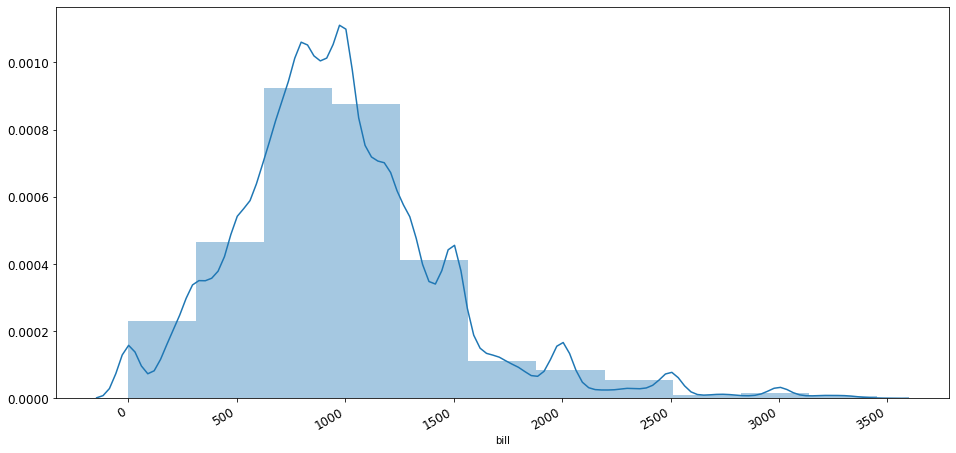

In [328]:
plt.figure(figsize=(16, 8))
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 
sns.distplot(new_df.loc[new_df.bill<3500, 'bill'], bins=11,)
# df.bill.hist(bins=15)
plt.gcf().autofmt_xdate()

In [330]:
new_df['bill_str'] = ''
new_df.loc[new_df.bill <=300, 'bill_str'] = 'до 300р.'
new_df.loc[(new_df.bill >300) & (new_df.bill < 700), 'bill_str'] = 'от 301р. до 699р.'
new_df.loc[(new_df.bill >=700) & (new_df.bill < 1250), 'bill_str'] = 'от 700р. до 1249р.'
new_df.loc[(new_df.bill >=1250) & (new_df.bill < 2500), 'bill_str'] = 'от 1250 до 2499р.'
new_df.loc[new_df.bill >=2500, 'bill_str'] = 'от 2500р.'

In [3]:
import geojson
from shapely.geometry import Polygon, Point
import shapely

In [150]:
polygons = pd.read_csv('Полигоны СПБ_Migrated Data.csv', sep = ';')

In [151]:
with open('../НИР/admin_level_5.geojson', encoding = 'utf-8') as f:
    gj = geojson.load(f)
features = gj['features'][0]

In [152]:
boundaries = pd.json_normalize(gj.features)

In [153]:
districts = boundaries.loc[boundaries['properties.addr:region']=='Санкт-Петербург']

In [40]:
for i, r in new_df.loc[new_df.district.isna()].iterrows():
    point = Point(r['lng'], r['lat'])
    for j, d in districts.iterrows():
        for c in d['geometry.coordinates']:        
            polygon = Polygon(c[0])
            if polygon.contains(point):
                new_df.loc[i, 'district'] = d['properties.name']

In [44]:
new_df['district_n'] = new_df.district.astype('category').cat.codes+1

In [154]:
def get_boundaries():
    import geojson
    from shapely.geometry import Polygon, Point
    import shapely
    polygons = pd.read_csv('Полигоны СПБ_Migrated Data.csv', sep = ';')
    with open('../НИР/admin_level_5.geojson', encoding = 'utf-8') as f:
        gj = geojson.load(f)
    features = gj['features'][0]
    boundaries = pd.json_normalize(gj.features)
    return boundaries.loc[boundaries['properties.addr:region']=='Санкт-Петербург']

def get_district(lat, lon):
    point = Point(lon, lat)
    for j, d in districts.iterrows():
        for c in d['geometry.coordinates']:        
            polygon = Polygon(c[0])
            if polygon.contains(point):
                return d['properties.name']

# Аренда недвижимости (парсинг Циана)

In [6]:
driver = webdriver.Chrome()

In [103]:
def check_empty(exp):
    if exp == '':
        return 0
    else:
        return float(exp)

In [196]:
places = []
for i in range(1,20):
    driver.get('https://spb.cian.ru/cat.php?deal_type=rent&engine_version=2&offer_type=offices&office_type%5B0%5D=4&p='+str(i)+'&region=2')
    time.sleep(5)
    items = driver.find_elements_by_xpath("//div[@class = '_93444fe79c--commercialWrapper--fYaWL']")
    for i in items:
        numbers = re.findall(r'(\d+\.\d+|\d+)', i.find_element_by_class_name('c6e8ba5398--header-link--3XZlV').text.replace(',', '.').replace(' ', ''))
        if i.find_element_by_class_name('c6e8ba5398--header-link--3XZlV').text.find('Своб. назнач.') == -1:
            try:  
                numbers = re.findall(r'(\d+\.\d+|\d+)', i.find_element_by_class_name('c6e8ba5398--header-subtitle--24WXl').text.replace(',', '.').replace(' ', ''))
            except:
                pass   
        address = i.find_element_by_class_name('c6e8ba5398--address-path--2Z9T3').text.split(',')
        places.append({
            'area_start':check_empty(numbers[0]),
            'area_end'  :check_empty(''.join(numbers[1:-1])),
            'cost'      :check_empty(numbers[-1]),
            'address'   : address[0]+', '+ ', '.join(address[-2:]),
            'address_temp': ', '.join(address),
            'metro'     :''.join(address[3:-2]).strip()
                      })

In [197]:
places_df = pd.DataFrame(places)

In [310]:
lat = []
lon = []
for a in places_df.loc[places_df.lon>31].address:
    token = 'pk.eyJ1IjoieXVwZXN0IiwiYSI6ImNqdWpwOTJ6ZTA5MmQzeW1xeGdrb3VhcjkifQ.UEEIc5yM8s1lfMaREu-p6Q'
    response = requests.get('https://api.mapbox.com/geocoding/v5/mapbox.places/'+a.replace('/', '%2f')+'.json?access_token='+token).json()
    print(a)
    try:
        c = response['features'][1]['geometry']['coordinates']
        lat.append(c[0])
        lon.append(c[1])
    except:
        lat.append(None)
        lon.append(None)

Санкт-Петербург,  проспект Старорусский,  6
Санкт-Петербург,  проспект Старорусский,  6
Санкт-Петербург,  проспект Старорусский,  6
Санкт-Петербург,  улица Плесецкая,  6


In [309]:
lat, lon

([104.23, 104.23, 104.23, 104.23], [52.25, 52.25, 52.25, 52.25])

In [302]:
places_df.loc[places_df.lon>31, 'lon'] = lat
places_df.loc[places_df.lon>31, 'lat'] = lon

ValueError: Must have equal len keys and value when setting with an iterable

In [325]:
districts = get_boundaries()
list_districts = []
for lt, ln in zip(places_df.lat, places_df.lon):
    try:
        list_districts.append(get_district(lt, ln))
    except:
        list_districts.append(None)

In [326]:
places_df['district'] = list_districts

In [337]:
set(list_districts)

{None,
 'Адмиралтейский район',
 'Василеостровский район',
 'Выборгский район',
 'Калининский район',
 'Кировский район',
 'Колпинский район',
 'Красногвардейский район',
 'Красносельский район',
 'Курортный район',
 'Московский район',
 'Невский район',
 'Петроградский район',
 'Петродворцовый район',
 'Приморский район',
 'Пушкинский район',
 'Фрунзенский район',
 'Центральный район'}

In [335]:
places_df['price_psm'] = places_df.cost/places_df.area_start

In [332]:
requests.get('https://api.mapbox.com/geocoding/v5/mapbox.places/Санкт-Петербург,  площадь Троицкая Петроградской стороны,  1.json?access_token='+token).json()

{'type': 'FeatureCollection',
 'query': ['санкт',
  'петербург',
  'площадь',
  'троицкая',
  'петроградской',
  'стороны',
  '1'],
 'features': [{'id': 'postcode.8898264694606920',
   'type': 'Feature',
   'place_type': ['postcode'],
   'relevance': 0.627249,
   'properties': {},
   'text': '188640',
   'place_name': '188640, Свердловское, Saint Petersburg, Russia',
   'bbox': [29.9973907211025,
    59.767283612656,
    31.007457977957,
    60.523746752038],
   'center': [30.52, 59.89],
   'geometry': {'type': 'Point', 'coordinates': [30.52, 59.89]},
   'context': [{'id': 'place.16386778088582100', 'text': 'Свердловское'},
    {'id': 'district.855264694848660',
     'wikidata': 'Q1036323',
     'text': 'Всеволожский район'},
    {'id': 'region.11183015516215360',
     'wikidata': 'Q656',
     'short_code': 'RU-SPE',
     'text': 'Saint Petersburg'},
    {'id': 'country.299986422520',
     'wikidata': 'Q159',
     'short_code': 'ru',
     'text': 'Russia'}]},
  {'id': 'postcode.1037419

In [333]:
places_df.loc[314, 'lat'] = 30.327843
places_df.loc[314, 'lon'] = 59.952921

In [336]:
places_df.to_csv('realty.csv', index = False)

In [156]:
m = folium.folium.Map([lon[0],lat[0]], zoom_start=10, tiles = 'CartoDB positron')
folium.LatLngPopup().add_to(m)
for lt, ln in zip(lon, lat):
    try:
        folium.Marker(
            location=[lt, ln], # координаты широты и долготы
            icon=folium.Icon()
        ).add_to(m)
    except:
        pass
m